#CPCS433_Project

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import plotly.express as px
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import IsolationForest, RandomForestClassifier

## **Load The DataSet**

In [ ]:
# Loading The Dataset
dataset = pd.read_csv('/content/riceClassification.csv')

In [ ]:
# Print The Shape Of Data
dataset.shape

(18185, 12)

In [ ]:
# Print The Data
dataset

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [ ]:
# Print The Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


## **Preprocess The Dataset**

**1. Missing Values**

In [ ]:
# Checking For Missing Values
dataset.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

There Is No Missing Value In Our DataSet

**2. Duplicated Values**

In [ ]:
# Checking For Duplicated Values
print('Number Of Duplicated Values In The Dataset: ', dataset.duplicated().sum())

Number Of Duplicated Values In The Dataset:  0


There Is No Duplicated Value In Our DataSet

**3. Class Imbalance**

In [ ]:
# Check For Class Imbalance In The Dependent Variable
print (dataset['Class'].value_counts(ascending = True))

Class
0    8200
1    9985
Name: count, dtype: int64


There Is No Class Imbalance In Our Dependent Variable, We Can See Clearly That The Count Of Class 0 Is 8200, And The Count Of Class 1 Is 9985 Which Shwos A Balance

Here Class 0 Means Jasmine Rice

and Class 1 Means Gonen Rice

In [ ]:
# Drop Unneeded Column Like ID
dataset = dataset.drop('id', axis = 1)

**4. Handle Outliers**

In [ ]:
# Using IsolationForest To Detect And Fliter Out Outliers
clf = IsolationForest(random_state=1)
outliers = clf.fit_predict(dataset)
dataset = dataset[outliers == 1]

In [ ]:
# Print The Shape After Flitering Outliers
dataset.shape

(15390, 11)

We Can See Clearly number of rows decrees from 18185 to 14779

**5. HeatMap**

<Axes: >

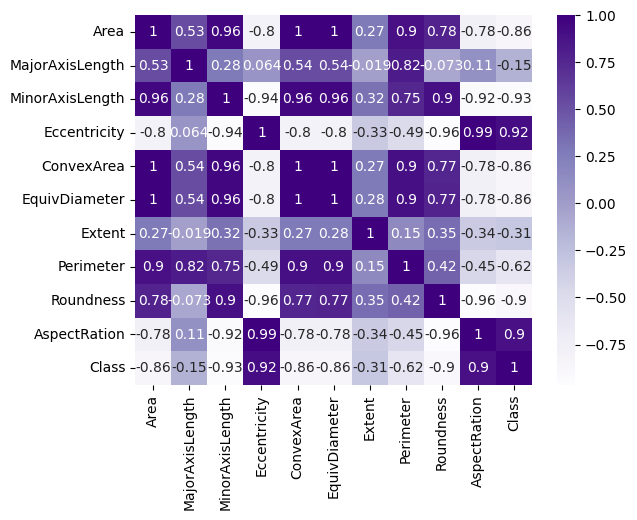

In [ ]:
# Heatmap To Showcase The Correlation
sns.heatmap(dataset.corr(),cmap = "Purples", annot = True)

##Training the model

In [ ]:
# Split The Values Of Independent Features(X) And Dependent Target(Y)
X = dataset.drop(columns = 'Class', axis = 1)
Y = dataset['Class']

In [ ]:
# Splitting The Data Useing Splitting Ratio 70:30
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0 )

##Testing the model

**1. Random Foesrt**

**1.1 Accuracy**

In [ ]:
RandomForest_model = RandomForestClassifier()

# Fit Data To Random Forest Model
RandomForest_model.fit(X_train, Y_train)
Y_Train_Pred = RandomForest_model.predict(X_train)

# Print The Accuracy Score For Trainign
Train_Accuracy = metrics.accuracy_score(Y_train,Y_Train_Pred)
print ("Train Accuracy : %s" % "{0:.3%}".format(Train_Accuracy))


# Print The Accuracy Score For Testing
Y_Test_Pred = RandomForest_model.predict(X_test)
Test_Accuracy = metrics.accuracy_score(Y_test,Y_Test_Pred)
print ("Test Accuracy : %s" % "{0:.3%}".format(Test_Accuracy))


NameError: name 'RandomForestClassifier' is not defined

**1.2 Confusion Matrix**

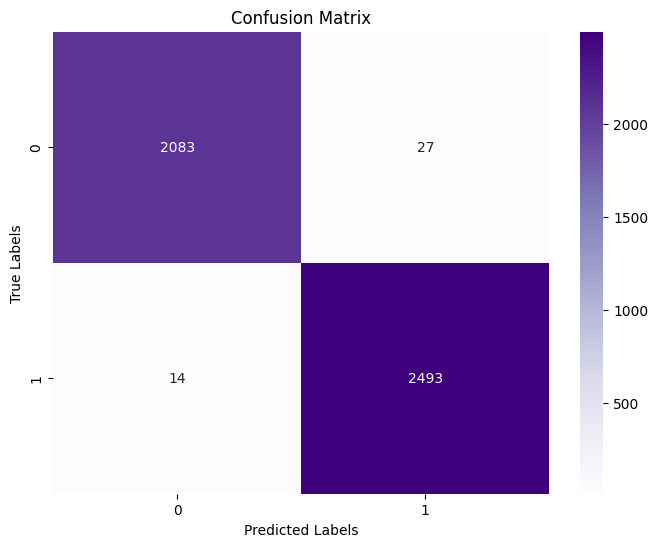

In [ ]:
# Compute Confusion Matrix
ConfusionMatrix = confusion_matrix(Y_test,Y_Test_Pred)

# Display Confusion Matrix Using A Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(ConfusionMatrix, annot = True, fmt = "d", cmap = "Purples", cbar = True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**2. Decision Tree**

**2.1 Accuracy**

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=5)  # You can change the depth here

# Fit the model on the training data
dt_classifier.fit(X_train, Y_train) # Predict on the testing data
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy in percentage
accuracy_percentage = accuracy_score(Y_test, y_pred) * 100

# Fit the model on the training data
y_pred2 = dt_classifier.predict(X_train)

# Calculate the accuracy in percentage
accuracy_percentage2 = accuracy_score(Y_train, y_pred2) * 100

# Evaluate the model
print("Accuracy: {:.2f}%".format(accuracy_percentage))

# Evaluate the model
print("Accuracy: {:.2f}%".format(accuracy_percentage2))



Accuracy: 99.05%
Accuracy: 99.49%


**2.2 Confusion Matrix**

In [ ]:
# Compute Confusion Matrix
ConfusionMatrix = confusion_matrix(Y_test, y_pred)

# Display Confusion Matrix Using A Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'confusion_matrix' is not defined